# Extra Credit

### 1) Use OpenCV to augment the CIFAR-10 dataset with constructed images. Try the following transformations:

    a)	Vertical/horizontal flip
    b)	Rotation by a multiple of 90
    c)	Shifting the image in a particular direction by a few pixels


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import pandas as pd
import pprint as pp


import cv2 # OpenCV-Python
print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 3.4.2


In [1]:
# function to open pickled python files
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

### Meta Data

There are 10,000 cases per batch and 3072 values per visual.  
There are 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck

In [2]:
batches_meta = unpickle("data/cifar_10_batches_py/batches.meta")
print(batches_meta.keys())
print(batches_meta)

dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])
{b'num_cases_per_batch': 10000, b'label_names': [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck'], b'num_vis': 3072}


### Explore Batch 1

There are four keys in each batch: 
- the batch label
- the labels corresponding to the image
- the 3072 array to define each image
- the filename.

In [3]:
batch_1 = unpickle("data/cifar_10_batches_py/data_batch_1")
print(len(batch_1))
print(batch_1.keys())

4
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [6]:
pp.pprint(batch_1[b'batch_label'])

b'training batch 1 of 5'


In [7]:
pp.pprint(batch_1[b'labels'][:20]) # first 20 image labels

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]


In [8]:
pp.pprint(batch_1[b'data'][0]) # first image array
print("Dimension:", batch_1[b'data'][0].ndim)
print("Shape:", batch_1[b'data'][0].shape)
print("Filename:", batch_1[b'filenames'][0])

array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)
Dimension: 1
Shape: (3072,)
Filename: b'leptodactylus_pentadactylus_s_000004.png'


### Example Image

In [9]:
image1 = list(batch_1.values())[2][0] # extract first set of 3072 values

# divide array into 2D arrays for each color
# divide by 255 because max value for RGB scale
reds = np.reshape(image1[:1024],(32,32))/255
greens = np.reshape(image1[1024:2048],(32,32))/255
blues = np.reshape(image1[2048:],(32,32))/255

# create a 3D array
image1 = np.dstack((reds,greens,blues))
print("Dimension:", image1.ndim)
print("Shape:", image1.shape)

Dimension: 3
Shape: (32, 32, 3)


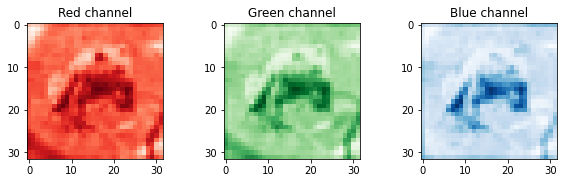

In [10]:
plt.figure(figsize=(10,2.5))
plt.subplot(131)
plt.gca().set_title('Red channel')
plt.imshow(reds, cmap='Reds', interpolation='nearest')
plt.subplot(132)
plt.gca().set_title('Green channel')
plt.imshow(greens, cmap='Greens', interpolation='nearest')
plt.subplot(133)
plt.gca().set_title('Blue channel')
plt.imshow(blues, cmap='Blues', interpolation='nearest')

plt.show()

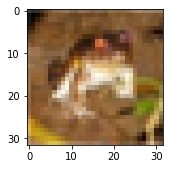

In [11]:
plt.figure(figsize=(2.5,2.5))
plt.imshow(image1, cmap=plt.cm.gray) 
plt.show()

### Vertical Flip

### Horizontal Flip

### Rotation by a multiple of 90


### Shifting the image in a particular direction by a few pixels